# PHASE 1 FINAL PROJECT

### INTRODUCTION
Microsoft has seen other companies have success in the movie industry and has decided to open its movie studio. It however knows nothing about the movie industry. It has decided to hire you as a Data Scientist to determine the type of films which are most popular at the Box Office. You are then supposed to convert your findings into actionable insights which you are supposed to give to the head of the new movie studio of Microsoft.

### OBJECTIVES
The objective of this project is to:
- Analyse data to determine the type of films which do best at the box office.
- Transform findings to actionable insights to give to head of new Microsoft movie studios.
- Use findings to come up with 3 recommendations with visualisations which is to be given to the head of the movie studio.

## BUSINESS UNDERSTADING

This is the thorough understanding of the problem at hand, so that the respective Data Scientist/scientists can come up with a solution that effectively solves the problem. The business understanding of a Data Science problem is split into various parts which are:
1. Problem Statement
2. Measure of success

### PROBLEM STATEMENT
This is the problem in which as a Data Scientist one is trying to solve. In the case of this project by **Microsoft**, the issue is to determine the type of movies doing best at the box office. The Data Scientist is to then use his findings to provide actionable insights in the form of three recommendations with visualisations. The head of Microsoft's new movie studio is to then use these findings, to know which type of movies to make.

### MEASUREMENT OF SUCCESS
This is the measure of success of the project in relation to the problem statement and the business understanding. For this particular problem here is our measurement of success. To uncover actionable insights through exploratory data analysis (EDA) to identify the types of films that have achieved the highest levels of success at the box office. Success will be measured by analyzing various factors such as box office revenue, audience ratings, genre popularity, and critical acclaim. The goal of this analysis, is to gain a comprehensive understanding of the characteristics and attributes that contribute to a movie's success. This will enable Microsoft's new movie studio to make informed decisions about the types of films they should produce. The success of the project will be reflected in the quality and relevance of the insights generated, which will provide valuable guidance for Microsoft's strategic planning in the movie industry.


## DATA UNDERSTANDING
Data Understanding is a crucial phase in the Data Science process where the Data Scientist dives deep into the available data, aiming to gain a comprehensive understanding of its characteristics, quality, and relevance to the defined problem. This involves exploring the data, identifying patterns and trends, assessing data quality and completeness, and gaining insights that will inform subsequent steps in the analysis. By thoroughly understanding the data, the Data Scientist can make informed decisions on how to preprocess, analyze, and model the data to extract meaningful insights and solve the problem effectively.

For the problem we are trying to solve this can involve several steps as shown below:

### 1. Familiarising ourselves with the data.

For the problem at hand, the data relevant to the question was split into two parts. A database file called **im.db** which is a database of movies released with the following relevant tables:
- Movie Basics
- Movie ratings

The second part are three csv files:
- bom.movie_gross.csv
- rt.reviews.tsv
- title.ratings.csv
- MovieData.csv

Other data has been provided if needed for further analysis.

### 2. Importing libraries
We then load the libraries that are to be used.

In [2]:
# Importing libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

### 3. Loading the data
Finally we load the data itself to see what we are dealing with

In [3]:
# Connecting to the database
conn = sqlite3.connect(r'C:\Users\USER\Desktop\database\im.db')

In [4]:
# Seeing the tables in the database
pd.read_sql('SELECT * FROM sqlite_master;', conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [5]:
# First the relevant tables in the im.db database
movie_basics = pd.read_sql('SELECT * FROM movie_basics;', conn)
movie_ratings = pd.read_sql('SELECT * FROM movie_ratings;', conn)

# Then the relevant csv files
gross_data = pd.read_csv('bom.movie_gross.csv')
ratings_data = pd.read_csv('title.ratings.csv')
budgets_data = pd.read_csv('tn.movie_budgets.csv')
movie_data = pd.read_csv('MovieData.csv')

# Checking one of the tables in the database to see if the connection was successful.
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## DATA PREPARATION

Data preparation is an essential step following data understanding in the Data Science cycle. It involves preparing the data for analysis through meticulous data cleaning tasks. The key objectives of data preparation include:

- **Removing outliers**: Identification and removal of data points that deviate significantly from the overall distribution, as they can adversely impact analysis results.

- **Handling missing values**: Thoroughly checking for missing values and employing appropriate strategies to handle them, such as imputation techniques or assessing the suitability of the missing data for analysis.

- **Identifying and resolving duplicates**: Identifying and removing duplicate records to ensure data integrity and avoid bias in analysis outcomes.

- **Assessing columns with excessive missing values**: Evaluating columns with a substantial number of missing values and determining their relevance to the analysis. Dropping columns that are not essential or exploring alternative strategies for handling missing data.


- **Correcting data types**: Verifying and correcting the data types of variables to align them with their intended representation (e.g., converting numerical data from strings to numeric types).

Data preparation is an iterative and time-consuming process, as it aims to refine the data into an optimal state before analysis. By addressing data quality issues and standardizing formats data preparation ensures that subsequent analysis yields accurate and reliable insights.

For the data at hand we shall now begin the process of data cleaning for each table stated in the Data Understanding section.


Starting with the tables from the im.db database

 ## 1. Movie Basics

**1.First we handle the missing values**

In [6]:
# Looking at the general info of the table
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
# Checking for missing values
movie_basics.isnull().sum() # runtime_minutes, genres and original_title have missing values

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [8]:
# Dropping the runtime minutes as it has too many null values and there is no correlation between how long a movie is and its success at the box office
# movie_basics.drop(['runtime_minutes'], axis=1, inplace=True)
movie_basics  # Column has been dropped

,movie_id,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,None


In [9]:
# Now the genres column is a bit tricky since the goal is to determine what type of films do best at the box office.
# Finding percentage of missing values in genre column

# First isolating the missing values using filtering
missing_values = movie_basics['genres'][movie_basics['genres'].isnull()]

# Then finding the total no divided by the total no of the whole column then multiplying by 100.
percentage_missing = (len(missing_values) / len(movie_basics['genres'])) * 100

# Printing our results
print('The percentage of missing values is',percentage_missing,'%')

The percentage of missing values is 3.7004598204510617 %


In [11]:
 # Since the value of missing values is only 3.7% of the missing data in the 'genres' column we can just drop rows with missing values.
# movie_basics.dropna(subset=['genres'], inplace=True)
movie_basics  # Rows with missing values have been dropped

,movie_id,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy


In [12]:
# Checking to see if all missing values are removed
movie_basics.isnull().sum()

movie_id          0
primary_title     0
original_title    2
start_year        0
genres            0
dtype: int64

In [13]:
most_frequent_genre = movie_basics['original_title'].mode()[0]
movie_basics['original_title'].fillna(most_frequent_genre, inplace=True)

In [14]:
# Checking to see if all missing values are still there
movie_basics.isnull().sum()  # No more missing values.

movie_id          0
primary_title     0
original_title    0
start_year        0
genres            0
dtype: int64

**2.Then we handle the duplicates**

In [15]:
duplicates = movie_basics[movie_basics.duplicated()]
duplicates  # No duplicates in this table.

,movie_id,primary_title,original_title,start_year,genres


In [16]:
# There are no duplicates

**3.We now want to correct the datatypes**

In [17]:
# Checking the dtypes of each column in the movie_basics table.
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140736 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   movie_id        140736 non-null  object
 1   primary_title   140736 non-null  object
 2   original_title  140736 non-null  object
 3   start_year      140736 non-null  int64 
 4   genres          140736 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.4+ MB


In [18]:
# Isolating datatypes which do not conform to the datatypes for each column in the table
# Starting with the movie_id column
wrong_movie_id = [x for x in movie_basics['movie_id'] if type(x) != str]
print(wrong_movie_id)  # No wrong datatypes

# Then the primary title column
wrong_primary_title = [x for x in movie_basics['primary_title'] if type(x) != str]
print(wrong_primary_title)  # No wrong primary primary_title

# Then the original title
wrong_original_title = [x for x in movie_basics['original_title'] if type(x) != str]
print(wrong_original_title)  # No wrong original title

# Then the start year
wrong_start_year = [x for x in movie_basics['start_year'] if type(x) != int]
print(wrong_start_year)  # No wrong start year

# And finally the genres column
wrong_genre_type = [x for x in movie_basics['genres'] if type(x) != str]
print(wrong_genre_type)  # No wrong genres

[]
[]
[]
[]
[]


In [20]:
# In conclusion the table movie_basics has no wrong data types in each of its columns.

## 2. Movie ratings

**1.First we handle the missing values**

In [19]:
# Looking at the general info of the table
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [20]:
# Checkig for missing values
movie_ratings.isnull().sum()  # No missing values

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [21]:
# No missing values

**2. Then the duplicates**

In [22]:
duplicates = movie_ratings[movie_ratings.duplicated()]
duplicates

,movie_id,averagerating,numvotes


In [25]:
# No duplicates

**3. Correcting data types**

In [23]:
# Looking at the Dtypes of each column in the movie_ratings table
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [24]:
# Isolating datatypes which do not conform to the datatypes for each column in the table
# Starting with the movie_id column
wrong_movie_id = [x for x in movie_ratings['movie_id'] if type(x) != str]
print(wrong_movie_id)  # No wrong datatype

# Then the average rating 
wrong_rating = [x for x in movie_ratings['averagerating'] if type(x) != float]
print(wrong_rating)

# Then the numvotes
wrong_votes = [x for x in movie_ratings['numvotes'] if type(x) != int]
print(wrong_votes)

[]
[]
[]


In [28]:
# There are no wrong datatypes in this data.

**4. Removing outliers**

In [25]:
# Starting with the averagerating column

#  Finding the lower quantile
Q1 = movie_ratings['averagerating'].quantile(0.25)

# Finding the upper quantile
Q3 = movie_ratings['averagerating'].quantile(0.75)

# Finding IQR
IQR = Q3 - Q1

# Defining the lower bound and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound)

# Finding outliers
outliers = movie_ratings[(movie_ratings['averagerating'] < lower_bound) | (movie_ratings['averagerating'] > upper_bound)]
print('The number of outliers is', len(outliers))
print(len(outliers))

# Data without outliers
standardized_ratings = movie_ratings['averagerating'][(movie_ratings['averagerating'] > lower_bound) & (movie_ratings['averagerating'] < upper_bound)]
print(len(standardized_ratings))


2.6499999999999995
The number of outliers is 1172
1172
72684


In [26]:
# Then the numvotes column

# Lower quantile
Q1 = movie_ratings['numvotes'].quantile(0.25)

# Upper quantile
Q3 = movie_ratings['numvotes'].quantile(0.75)

# Finding IQR
IQR = Q3 - Q1

# Defining the lower bound and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Finding outliers
outliers = movie_ratings['numvotes'][(movie_ratings['numvotes'] < lower_bound) | (movie_ratings['numvotes'] > upper_bound)]
print(len(outliers))

# Data without outliers
standardized_numvotes = movie_ratings['numvotes'][(movie_ratings['numvotes'] > lower_bound) & (movie_ratings['numvotes'] < upper_bound)]
print(len(standardized_numvotes))


11758
62089


In [31]:
# Since I'm not sure on the effect of outliers on the data I'm gonna keep a copy with and without outliers and compare the two during analysis for now let us continue with data cleaning.

 ## 3. Gross values

**1. Handling missing values**

##### Looking at general info of the table.


In [27]:
gross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [28]:
# Looking for missing values
gross_data.isnull().sum()  # Domestic_gross and foreign_gross have missing values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [29]:
# There are several missing values in the domestic_gross and foreign_gross tables.
# Finding percentage missing for the domestic_gross and final_gross values

# First the domestic_gross
missing_domestic_gross = gross_data['domestic_gross'][gross_data['domestic_gross'].isnull()]
percentage_missing = (len(missing_domestic_gross) / len(gross_data['domestic_gross'])) * 100
print('The percentage of data missing for the domestic gross column is', percentage_missing)

# Then the foreign gross
missing_foreign_gross = gross_data['foreign_gross'][gross_data['foreign_gross'].isnull()]
percentage_missing = (len(missing_foreign_gross) / len(gross_data['foreign_gross'])) * 100
print('The percentage of data missing for the foreign gross column is', percentage_missing)

The percentage of data missing for the domestic gross column is 0.8266902863891349
The percentage of data missing for the foreign gross column is 39.85828166519043


In [31]:
# For the domestic gross column since only 0.82% of the data is missing we can just drop the rows with missing values.
# gross_data.dropna(subset=['domestic_gross'], inplace=True)
gross_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [32]:
# The foreign gross is a bit tricky since it has a lot of missing values so we can't drop the values without significantly affecting the data.
# But we also can't just fill it with mean or mode as that may skew the distribution of the range of data or create bias.
# For now we will use forward fill to fill it with the value that preceeds it which is not null.
filled_data = gross_data['foreign_gross'].fillna(method='ffill')
gross_data['foreign_gross'] = filled_data
gross_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,30000,2018
3383,Edward II (2018 re-release),FM,4800.0,30000,2018
3384,El Pacto,Sony,2500.0,30000,2018
3385,The Swan,Synergetic,2400.0,30000,2018


**2. Handling duplicates**

In [33]:
gross_data[gross_data.duplicated()]

,title,studio,domestic_gross,foreign_gross,year


In [106]:
# There are no duplicates in this data.

**3. Correcting data types**

In [34]:
# Checking the data types of each column
gross_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3359 non-null   object 
 4   year            3359 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.5+ KB


In [35]:
# Checking for the 5 columns if there's a value which does not match the datatype.
# Starting with the title column
wrong_title_type = [x for x in gross_data['title'] if type(x) != str]
print(wrong_title_type)  # No wrong datatypes

# Then the studio column
wrong_studio_type = [x for x in gross_data['studio'] if type(x) != str]
print(wrong_studio_type)  # 3 rows with wrong datatypes

# Then the domestic_gross column
wrong_domestic_gross = [x for x in gross_data['domestic_gross'] if type(x) != float]
print(wrong_domestic_gross)  # No wrong domestic gross

# Then the foreign_gross column
wrong_foreign_gross = [x for x in gross_data['foreign_gross'] if type(x) != str]
print(wrong_foreign_gross)  # No wrong foreign gross

# And finally the year column
wrong_year_type = [x for x in gross_data['year'] if type(x) != int]
print(wrong_year_type)  # No wrong year

[]
[nan, nan, nan]
[]
[]
[]


In [36]:
# Since there are only 3 values we can just google the name of the studios.
# For row 210 the studio name is Tessalit Productions hence replacing Nan.
gross_data.loc[210, 'studio'] = 'Tessalit Productions'

# For row 555 the studio name is Senator Entertainment Inc.
gross_data.loc[555, 'studio'] = 'Senator Entertainment Inc'

# For row 1862 the producer is Mandy Jacobson as it was a documentary
gross_data.loc[1862, 'studio'] = ' Mandy Jacobson'

print('After replacing')
print(gross_data[gross_data['studio'].isna()])  # No more nan values


After replacing
Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


**4. Handling outliers**

In [37]:
# Seeing general info of the data.
gross_data.info()  # The numeric values are domestic_gross and year

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3359 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3359 non-null   object 
 4   year            3359 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 286.5+ KB


In [38]:
# Starting with the domestic_gross column

#  Finding the lower quantile
Q1 = gross_data['domestic_gross'].quantile(0.25)

# Finding the upper quantile
Q3 = gross_data['domestic_gross'].quantile(0.75)

# Finding IQR
IQR = Q3 - Q1

# Defining the lower bound and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound)

# Finding outliers
outliers = gross_data['domestic_gross'][(gross_data['domestic_gross'] < lower_bound) | (gross_data['domestic_gross'] > upper_bound)]
print('The number of outliers is', len(outliers))

# Data without outliers
standardized_ratings = gross_data['domestic_gross'][(gross_data['domestic_gross'] > lower_bound) & (gross_data['domestic_gross'] < upper_bound)]
print('The length of the column without outliers is', len(standardized_ratings))

# There are outliers but that shouldn't affect our analysis as some movies earn a profit and some don't

-41550000.0
The number of outliers is 406
The length of the column without outliers is 2953


In [39]:
# Starting with the domestic_gross column

#  Finding the lower quantile
Q1 = gross_data['year'].quantile(0.25)

# Finding the upper quantile
Q3 = gross_data['year'].quantile(0.75)

# Finding IQR
IQR = Q3 - Q1

# Defining the lower bound and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound)

# Finding outliers
outliers = gross_data['year'][(gross_data['year'] < lower_bound) | (gross_data['year'] > upper_bound)]
print('The number of outliers is', len(outliers))

# Data without outliers
standardized_ratings = gross_data['year'][(gross_data['year'] > lower_bound) & (gross_data['year'] < upper_bound)]
print('The length of the column without outliers is', len(standardized_ratings))

# The year column has no outliers

2006.0
The number of outliers is 0
The length of the column without outliers is 3359


In [40]:
# One last thing converting the tables with numbers to be numeric.
# gross_data['foreign_gross'] = gross_data['foreign_gross'].str.replace('$', '').str.replace(',', '').astype(float)
gross_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3359 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3359 non-null   float64
 4   year            3359 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 286.5+ KB


## 4. Ratings

**1. Checking for missing values**

####  Checking general info of the table.

In [41]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [42]:
# Looking for missing values
ratings_data.isnull().sum()  # No missing values

tconst           0
averagerating    0
numvotes         0
dtype: int64

**2. Checking for duplicates**

In [43]:
ratings_data[ratings_data.duplicated()]  # There are no duplicates

,tconst,averagerating,numvotes


**3. Correcting datatypes**

In [44]:
# Checking datatype for each column
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [45]:
# Checking for the 3 columns if there's a value which does not match the datatype.
# Starting with the tconst column
wrong_tconst = [x for x in ratings_data['tconst'] if type(x) != str]
print(wrong_tconst)  # No wrong datatypes in tconst column

# Then the averagerating column
wrong_averagerating = [x for x in ratings_data['averagerating'] if type(x) != float]
print(wrong_averagerating)  # 3 rows with wrong datatypes

# Then the numvotes column
wrong_numvotes = [x for x in ratings_data['numvotes'] if type(x) != int]
print(wrong_domestic_gross)  # No wrong datatypes in numvotes column

# No rows with wrong datatype in any of the columns.

[]
[]
[]


**4. Handling outliers**

In [46]:
# Seeing the general info of the table.
ratings_data.info()  # Two tables with numeric values which are averagerating and numvotes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [47]:
# Starting with the averagerating column

#  Finding the lower quantile
Q1 = ratings_data['averagerating'].quantile(0.25)

# Finding the upper quantile
Q3 = ratings_data['averagerating'].quantile(0.75)

# Finding IQR
IQR = Q3 - Q1

# Defining the lower bound and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound)

# Finding outliers
outliers = ratings_data['averagerating'][(ratings_data['averagerating'] < lower_bound) | (ratings_data['averagerating'] > upper_bound)]
print('The number of outliers is', len(outliers))

# Data without outliers
standardized_ratings = ratings_data['averagerating'][(ratings_data['averagerating'] > lower_bound) & (ratings_data['averagerating'] < upper_bound)]
print('The length of the column without outliers is', len(standardized_ratings))

# Yes there are outliers but some movies are just that bad so no need in removing outliers.

2.6499999999999995
The number of outliers is 1172
The length of the column without outliers is 72684


In [119]:
# Then the numvotes column

#  Finding the lower quantile
Q1 = ratings_data['numvotes'].quantile(0.25)

# Finding the upper quantile
Q3 = ratings_data['numvotes'].quantile(0.75)

# Finding IQR
IQR = Q3 - Q1

# Defining the lower bound and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound)

# Finding outliers
outliers = ratings_data['numvotes'][(ratings_data['numvotes'] < lower_bound) | (ratings_data['numvotes'] > upper_bound)]
print('The number of outliers is', len(outliers))

# Data without outliers
standardized_ratings = ratings_data[(ratings_data['numvotes'] > lower_bound) & (ratings_data['numvotes'] < upper_bound)]
print('The length of the column without outliers is', len(standardized_ratings))

standardized_ratings

-388.0
The number of outliers is 11758
The length of the column without outliers is 62089


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
4,tt1060240,6.5,21
5,tt1069246,6.2,326
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [48]:
# From now on during analysis of the ratings column we shall use the standardized_ratings variable.

## 5. Budgets

**1. Checking missing values**

#### Checking general info of the table.

In [120]:
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [49]:
# Checking for missing values
budgets_data.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

**2. Checking for duplicates**

In [50]:
budgets_data[budgets_data.duplicated()]  # No duplicates

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


**3. Correcting data types**

In [51]:
# Checking datatype for each column
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [52]:
# Checking for the 6 columns if there's a value which does not match the datatype.
# Starting with the id column
wrong_id = [x for x in budgets_data['id'] if type(x) != int]
print(wrong_id)  # No wrong datatypes

# Then the release_date column
wrong_release_date = [x for x in budgets_data['release_date'] if type(x) != str]
print(wrong_release_date)  # 3 rows with wrong datatypes

# Then the movie column
wrong_movie_data = [x for x in budgets_data['movie'] if type(x) != str]
print(wrong_movie_data)  # No wrong domestic gross

# Then the production budget column
wrong_budgets_data = [x for x in budgets_data['production_budget'] if type(x) != str]
print(wrong_budgets_data)  # No wrong foreign gross

# Then the domestic gross column
wrong_domestic_gross_data = [x for x in budgets_data['domestic_gross'] if type(x) != str]
print(wrong_domestic_gross_data)  # No wrong year

# Then the worldwide gross column
wrong_worldwide_gross_data = [x for x in budgets_data['worldwide_gross'] if type(x) != str]
print(wrong_worldwide_gross_data)  # No wrong year

# No wrong datatypes in the budgets_data column

[]
[]
[]
[]
[]
[]


In [53]:
budgets_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [57]:
# # One last thing removing the dollar signs and commas from the production_budget, domestic_gross, worldwide_gross and also converting it to a float
# # First the worldwide gross data
# budgets_data['worldwide_gross'] = budgets_data['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# # Then the domestic_gross column
# budgets_data['domestic_gross'] = budgets_data['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# # And finally the production_budget column
# budgets_data['production_budget'] = budgets_data['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)

budgets_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [67]:
# Hence data cleaning is finished for the budgets_data table.

## 6. Movie Data

**1.Checking missing values**

In [58]:
# Looking at general info of the table.
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_name                1936 non-null   object 
 1   production_year           1936 non-null   int64  
 2   movie_odid                1936 non-null   int64  
 3   production_budget         1936 non-null   int64  
 4   domestic_box_office       1936 non-null   int64  
 5   international_box_office  1936 non-null   int64  
 6   rating                    1913 non-null   object 
 7   creative_type             1923 non-null   object 
 8   source                    1915 non-null   object 
 9   production_method         1925 non-null   object 
 10  genre                     1926 non-null   object 
 11  sequel                    1934 non-null   float64
 12  running_time              1822 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 196.8+ KB


In [59]:
# Checking for missing values
movie_data.isnull().sum()

movie_name                    0
production_year               0
movie_odid                    0
production_budget             0
domestic_box_office           0
international_box_office      0
rating                       23
creative_type                13
source                       21
production_method            11
genre                        10
sequel                        2
running_time                114
dtype: int64

In [60]:
# Checking percentage of missing values for each column
for column in movie_data.columns:
    percentage = movie_data[column].isnull().sum() / len(movie_data[column])
    print('The percentage of data missing in the column', column, 'is', percentage)

The percentage of data missing in the column movie_name is 0.0
The percentage of data missing in the column production_year is 0.0
The percentage of data missing in the column movie_odid is 0.0
The percentage of data missing in the column production_budget is 0.0
The percentage of data missing in the column domestic_box_office is 0.0
The percentage of data missing in the column international_box_office is 0.0
The percentage of data missing in the column rating is 0.011880165289256199
The percentage of data missing in the column creative_type is 0.006714876033057851
The percentage of data missing in the column source is 0.01084710743801653
The percentage of data missing in the column production_method is 0.005681818181818182
The percentage of data missing in the column genre is 0.005165289256198347
The percentage of data missing in the column sequel is 0.0010330578512396695
The percentage of data missing in the column running_time is 0.058884297520661155


In [65]:
# Starting with the column creative type only 0.0067 percent of values is missing hence we can just drop them.
# movie_data.dropna(subset=['creative_type'], inplace=True)
movie_data.isnull().sum()

movie_name                    0
production_year               0
movie_odid                    0
production_budget             0
domestic_box_office           0
international_box_office      0
rating                       19
creative_type                 0
source                       10
production_method             2
genre                         0
sequel                        2
running_time                105
dtype: int64

**We are finished with Data Cleaning hence our data has been prepared and is ready for EDA (Exploratory Data Analysis.)**

In [66]:
# Next to the production_method column we can just drop missing values
# movie_data.dropna(subset=['production_method'], inplace=True)
movie_data.isnull().sum()

movie_name                    0
production_year               0
movie_odid                    0
production_budget             0
domestic_box_office           0
international_box_office      0
rating                       17
creative_type                 0
source                        8
production_method             0
genre                         0
sequel                        2
running_time                105
dtype: int64

In [67]:
# The column running time is not important for analysis so we can just drop the whole column.
# movie_data.drop(['running_time'], axis=1, inplace=True)
movie_data

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1931,The Nutcracker and the Four Realms,2018,298170100,132900000,54858851,115435048,PG,Fantasy,Based on Folk Tale/Legend/Fairytale,Live Action,Adventure,0.0
1932,Aquaman,2018,213100100,160000000,333804251,805605026,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,0.0
1933,Ralph Breaks The Internet,2018,263730100,175000000,200236625,319167373,PG,Kids Fiction,Original Screenplay,Digital Animation,Adventure,1.0
1934,Mission: Impossible—Fallout,2018,248680100,178000000,220159104,567297448,PG-13,Contemporary Fiction,Based on TV,Live Action,Action,1.0


In [68]:
# For the genre column it only has 1 missing value but we can just fill them with values from searching since it is only one.
movie_data[movie_data['genre'].isnull()]

# Filling the missing value
movie_data.loc[1116, 'genre'] = 'comedy'

# Checking to see if it worked
movie_data[movie_data['genre'].isnull()]  # Missing value filled

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel


In [69]:
# Filling the source column with the mode
# movie_data['source'].fillna(movie_data['source'].mode()[0], inplace=True)
movie_data.isnull().sum()

movie_name                   0
production_year              0
movie_odid                   0
production_budget            0
domestic_box_office          0
international_box_office     0
rating                      17
creative_type                0
source                       0
production_method            0
genre                        0
sequel                       2
dtype: int64

In [70]:
# For the sequel column lets just fill with mode
# movie_data['sequel'].fillna(movie_data['sequel'].mode()[0], inplace=True)
movie_data.isnull().sum()

movie_name                   0
production_year              0
movie_odid                   0
production_budget            0
domestic_box_office          0
international_box_office     0
rating                      17
creative_type                0
source                       0
production_method            0
genre                        0
sequel                       0
dtype: int64

In [71]:
# Now for the ratings column
# movie_data['rating'].fillna(movie_data['rating'].mode()[0], inplace=True)
movie_data.isnull().sum()
# No more missing values

movie_name                  0
production_year             0
movie_odid                  0
production_budget           0
domestic_box_office         0
international_box_office    0
rating                      0
creative_type               0
source                      0
production_method           0
genre                       0
sequel                      0
dtype: int64

**2. Checking for duplicates**

In [72]:
movie_data[movie_data.duplicated()]  # No duplicates

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel


**3. Correcting wrong data types**

In [73]:
# Seeing data type of the columns
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 0 to 1935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_name                1921 non-null   object 
 1   production_year           1921 non-null   int64  
 2   movie_odid                1921 non-null   int64  
 3   production_budget         1921 non-null   int64  
 4   domestic_box_office       1921 non-null   int64  
 5   international_box_office  1921 non-null   int64  
 6   rating                    1921 non-null   object 
 7   creative_type             1921 non-null   object 
 8   source                    1921 non-null   object 
 9   production_method         1921 non-null   object 
 10  genre                     1921 non-null   object 
 11  sequel                    1921 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 259.6+ KB


In [74]:
# Seeing datatype for one column
print(movie_data['movie_name'].dtype)

# Writing a for loop to see if there are wrong datatypes in each of the columns
# Starting with movie_name.
wrong_name = [x for x in movie_data['movie_name'] if type(x) != str]
print(wrong_name)

# Then production
wrong_production = [x for x in movie_data['production_year'] if type(x) != int]
print(wrong_production)

# Then movie_odid
wrong_odid = [x for x in movie_data['movie_odid'] if type(x) != int]
print(wrong_odid)

# Then production budget
wrong_production = [x for x in movie_data['production_budget'] if type(x) != int]
print(wrong_production)

# Then domestic box office
wrong_domestic = [x for x in movie_data['domestic_box_office'] if type(x) != int]
print(wrong_domestic)

# Then international box office
wrong_international = [x for x in movie_data['international_box_office'] if type(x) != int]
print(wrong_international)

# Rating
wrong_rating = [x for x in movie_data['rating'] if type(x) != str]
print(wrong_rating)

# Creative
wrong_creative = [x for x in movie_data['creative_type'] if type(x) != str]
print(wrong_creative)

# Source
wrong_source = [x for x in movie_data['source'] if type(x) != str]
print(wrong_source)

# Production method
wrong_method = [x for x in movie_data['production_method'] if type(x) != str]
print(wrong_method)

# Wrong genre
wrong_genre = [x for x in movie_data['genre'] if type(x) != str]
print(wrong_genre)

# Wrong sequel
wrong_sequel = [x for x in movie_data['sequel'] if type(x) != float]
print(wrong_sequel)

# No wrong data types

object
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [379]:
# Since values vary from one to another in how much money a movie earns there are no outliers

We have completed data preparation through data cleaning

## EXPLORATORY DATA ANALYSIS

This is a crucial part of the **CRISP DM (Cross Industry Process for Data Mining)**, the process in which Data Scientists use to find insights from data and possibly even model it if required. **Exploratory Data Analysis** is about going through data which has already been pre-processed through Data Cleaning so as to answer questions about the data. Usually during **EDA** there is a goal in mind and questions that need to be answered. These are questions that stem from the business understanding which includes the **problem statement** and the **business success** criteria. Overall **Exploratory Data Analysis** is an important process in the Data Science cycle used by Data Scientists everywhere in the world.

The purpose of this project or rather the problem statement was to determine the type of films which do best at the box office. After thorough analysis of the data at hand to achieve the problem statement, one is to transform these insights into 3 recommendations with visualisations to the head of Microsoft's new movie studio. He shall then use the recommendations to know which type of movies to start making.

In order to do this we shall begin with the first question:
- What is the relationship between the type of films and the domestic and or foreign gross it receives

In [75]:
# We use the movie_data after cleaning since it has both the genres and the earnings in a local and international level.
movie_data

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1931,The Nutcracker and the Four Realms,2018,298170100,132900000,54858851,115435048,PG,Fantasy,Based on Folk Tale/Legend/Fairytale,Live Action,Adventure,0.0
1932,Aquaman,2018,213100100,160000000,333804251,805605026,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,0.0
1933,Ralph Breaks The Internet,2018,263730100,175000000,200236625,319167373,PG,Kids Fiction,Original Screenplay,Digital Animation,Adventure,1.0
1934,Mission: Impossible—Fallout,2018,248680100,178000000,220159104,567297448,PG-13,Contemporary Fiction,Based on TV,Live Action,Action,1.0


In [76]:
# We use the movie_data table since it has the genres and the earnings in a domestic and international box office level
# We first of all use groupby to group the average international box office by genre and sorting the values from big to small.
genre_avg_foreign_gross = movie_data.groupby('genre')['international_box_office'].mean().sort_values(ascending=False)
genre_avg_foreign_gross

# We want to find the top 10 genres with the highest foreign gross and possibly plot a bar graph for this.
# First we begin by creating a dictionary that maps the sorted data's key to its value.
dictionary_of_foreign_gross = dict(genre_avg_foreign_gross)

# We then isolate the keys of the dictionary to find the top 10 genres since its already sorted from highest to lowest.
foreign_gross_keys = list(dictionary_of_foreign_gross.keys())
top_10_genres = foreign_gross_keys[:10]

# Then we isolate the values of the dictionary to find the top 10 values since its already sorted from highest to lowest.
foreign_gross_values = list(dictionary_of_foreign_gross.values())
top_10_values = foreign_gross_values[:10]

genre_avg_foreign_gross

genre
Musical                2.011386e+08
Adventure              1.930141e+08
Action                 1.843140e+08
Documentary            6.770103e+07
Thriller/Suspense      6.183242e+07
Western                5.660842e+07
Romantic Comedy        5.492061e+07
Horror                 5.138038e+07
Black Comedy           4.467123e+07
Drama                  4.140966e+07
Comedy                 3.815209e+07
comedy                 2.524579e+07
Concert/Performance    1.533291e+07
Name: international_box_office, dtype: float64

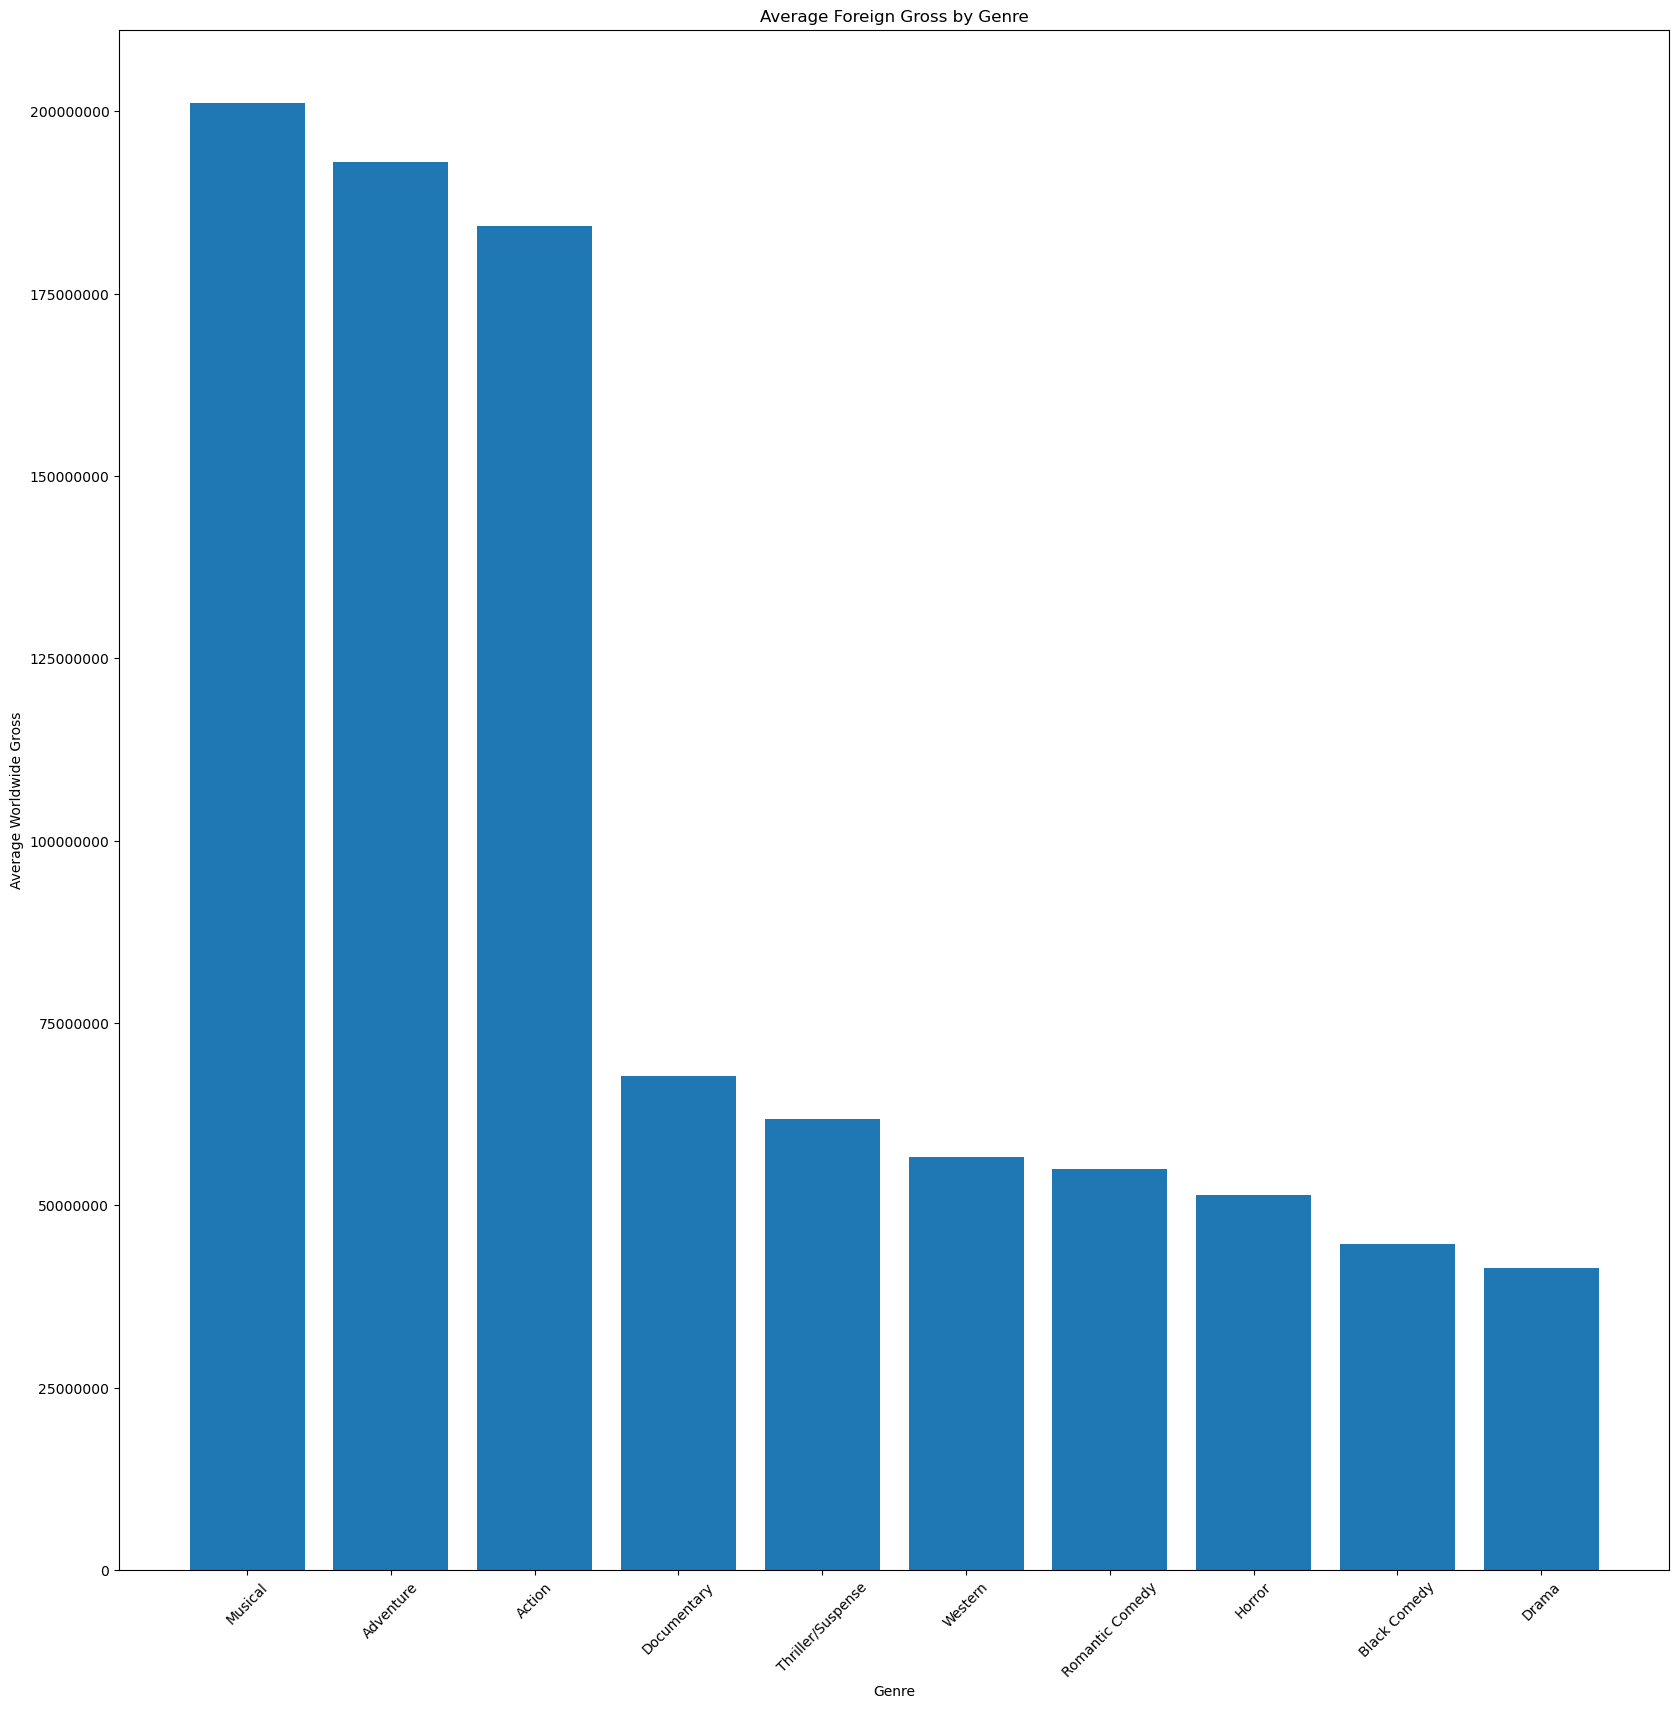

In [77]:
# We now want to represent this visually to show the type of movies which do well internationally.
plt.figure(figsize=(20, 20))
plt.bar(top_10_genres, top_10_values)
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.ticklabel_format(style='plain', axis='y')  # This is for removing the scale in the y-axis
plt.title('Average Foreign Gross by Genre')
plt.xticks(rotation=45);

The graph above answers the question on what type of films does well on an **international** level. It shows the top 10 type of films that do best at the box office on an **international** level.

In [78]:
# Now doing the same for the domestic gross to see what type of films perform best locally.
genre_avg_domestic_gross = movie_data.groupby('genre')['domestic_box_office'].mean().sort_values(ascending=False)
genre_avg_domestic_gross

# We want to find the top 10 genres with the highest foreign gross and possibly plot a bar graph for this.
# First we begin by creating a dictionary that maps key to value.
dictionary_of_domestic_gross = dict(genre_avg_domestic_gross)

# We then isolate the keys of the dictionary to find the top 10 genres since its already sorted from highest to lowest.
domestic_gross_keys = list(dictionary_of_domestic_gross.keys())
top_10_genres = domestic_gross_keys[:10]

# Then we isolate the values of the dictionary to find the top 10 values since its already sorted from highest to lowest.
domestic_gross_values = list(dictionary_of_foreign_gross.values())
top_10_values = domestic_gross_values[:10]

genre_avg_domestic_gross

genre
Musical                1.235329e+08
Adventure              1.126963e+08
Action                 9.744986e+07
Comedy                 5.064755e+07
Western                4.927270e+07
Romantic Comedy        4.589736e+07
Thriller/Suspense      4.544690e+07
Horror                 4.535191e+07
Black Comedy           3.651481e+07
Drama                  3.576640e+07
Concert/Performance    2.785387e+07
Documentary            2.757766e+07
comedy                 6.161100e+04
Name: domestic_box_office, dtype: float64

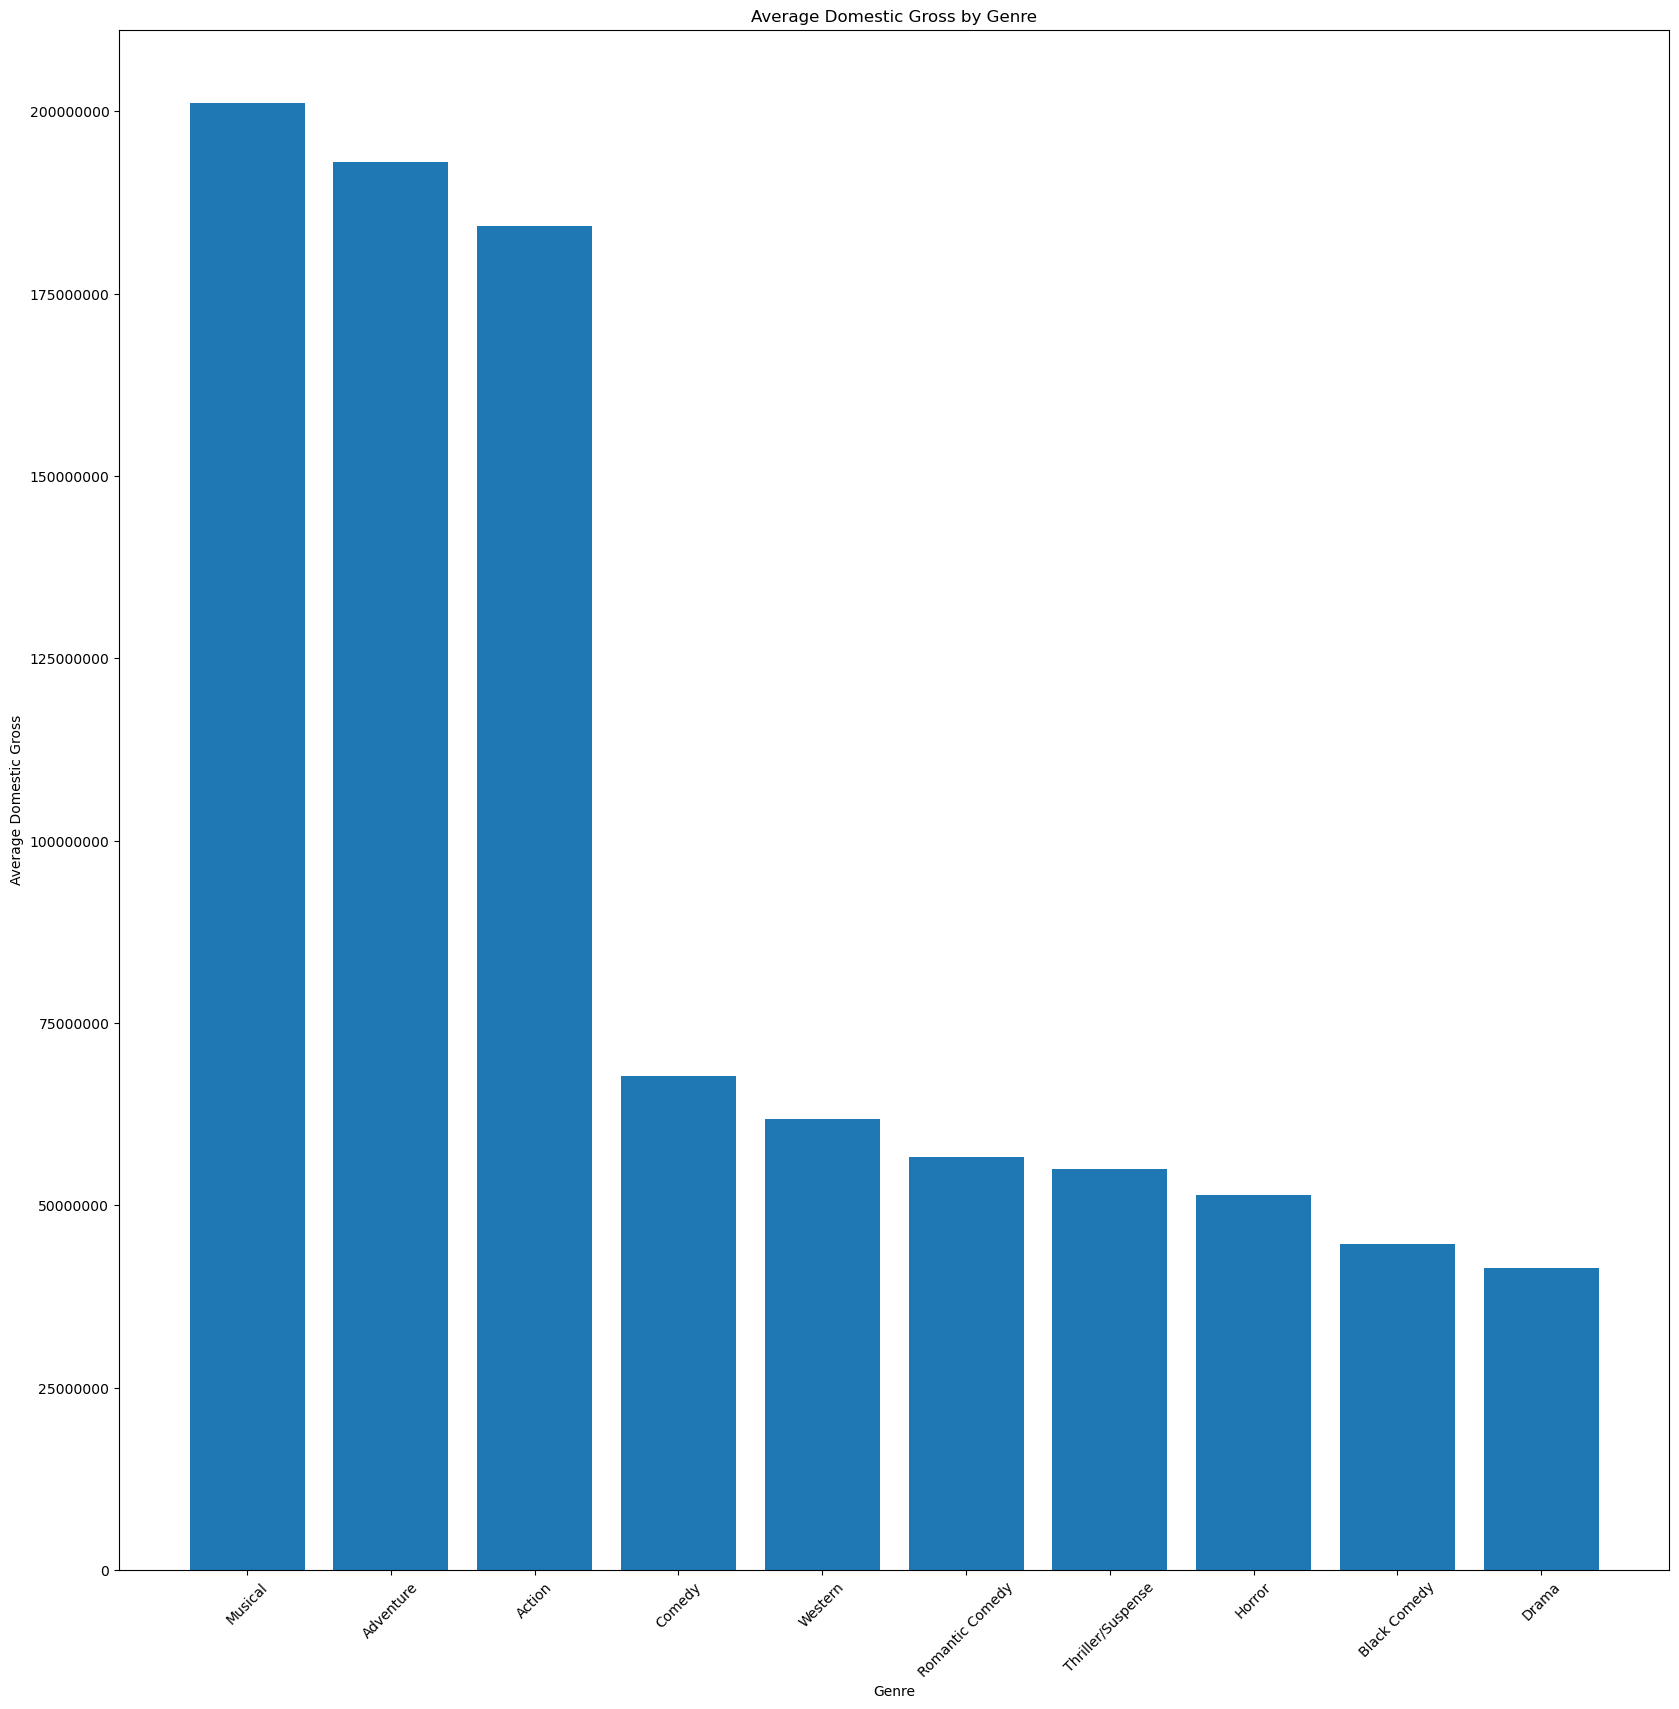

In [79]:
# We now want to represent this visually to show the type of movies which do well locally.
plt.figure(figsize=(20, 20))
plt.bar(top_10_genres, top_10_values)
plt.xlabel('Genre')
plt.ylabel('Average Domestic Gross')
plt.ticklabel_format(style='plain', axis='y')  # This is for removing the scale in the y-axis.
plt.title('Average Domestic Gross by Genre')
plt.xticks(rotation=45);

The graph above answers the question on what type of films does well on a **domestic** level. It shows the top 10 type of films that do best at the box office on a **domestic** level.

### It is important to note that both locally and internationally musicals earn the most money followed by adventure and then action films.

### With this analysis we have officially answered our first question on what type of films do best at the box office.